In [1]:
import pandas as pd
import requests as r
from bs4 import BeautifulSoup
import re
import sys
import functions as f
import numpy as np
import matplotlib.pyplot as plt


In [2]:
namePlayers = ["lebron", "kobe"]
stats = pd.read_csv("allgames_stats.csv")
stats.X = stats.X.apply(lambda x: "at" if x == "@" else "vs")
del stats["GS"]
del stats["GmSc"]
for player in namePlayers:
    if player == "Lebron James":
        lebron2018 = f.statsSeason("lebron", "2018", "LAL")
        lebron2019 = f.statsSeason("lebron", "2019", "LAL")
        stats.append(lebron2018)
        stats.append(lebron2019)
stats["Season"] = stats.Date.apply(f.season)
players = stats.Player.drop_duplicates(keep="first").tolist()
premios = [f.mvp_champion(i.replace(" ", "_")) for i in players]
for i in range(0, len(premios)):
    premios[i]["mvp"] = f.season_award(premios[i]["mvp"])
    premios[i]["champion"] = f.season_award(premios[i]["champion"])
listaPlayers = f.year_award(premios, stats)
allStats = pd.concat([i for i in listaPlayers])
allStats[allStats.Player == "Lebron James"]

,G,Date,Tm,X,Opp,Result,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Player,RSorPO,Season,MVP,NBA_Champion
1566,1,2003-10-29,CLE,at,SAC,L,42:00,12.0,20.0,0.60,...,4.0,0.0,2,3,25.0,Lebron James,Regular Season,2003/2004,N,N
1567,2,2003-10-30,CLE,at,PHO,L,41:00,8.0,17.0,0.47,...,1.0,0.0,7,1,21.0,Lebron James,Regular Season,2003/2004,N,N
1568,3,2003-11-01,CLE,at,POR,L,39:00,3.0,12.0,0.25,...,2.0,0.0,2,3,8.0,Lebron James,Regular Season,2003/2004,N,N
1569,4,2003-11-05,CLE,vs,DEN,L,41:00,3.0,11.0,0.27,...,2.0,3.0,2,1,7.0,Lebron James,Regular Season,2003/2004,N,N
1570,5,2003-11-07,CLE,at,IND,L,44:00,8.0,18.0,0.44,...,0.0,0.0,7,2,23.0,Lebron James,Regular Season,2003/2004,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,18,2018-05-27,CLE,at,BOS,W,48:00,12.0,24.0,0.50,...,0.0,2.0,8,4,35.0,Lebron James,Playoffs,2017/2018,N,N
2999,19,2018-05-31,CLE,at,GSW,L,47:32,19.0,32.0,0.59,...,1.0,1.0,5,2,51.0,Lebron James,Playoffs,2017/2018,N,N
3000,20,2018-06-03,CLE,at,GSW,L,43:51,10.0,20.0,0.50,...,2.0,0.0,5,2,29.0,Lebron James,Playoffs,2017/2018,N,N
3001,21,2018-06-06,CLE,vs,GSW,L,46:52,13.0,28.0,0.46,...,2.0,2.0,4,2,33.0,Lebron James,Playoffs,2017/2018,N,N


In [3]:
#table= allStats.pivot_table(index='Player',columns='PTS', aggfunc=sum, fill_value=0)

In [4]:
tabla2= allStats.groupby('Player').agg({'PTS':['sum','mean'], 'AST':'sum'})

In [5]:
tabla = allStats[allStats["RSorPO"] == "Regular Season"].groupby("Player").agg({"PTS": "sum", "AST": "sum", "TRB": "sum"})

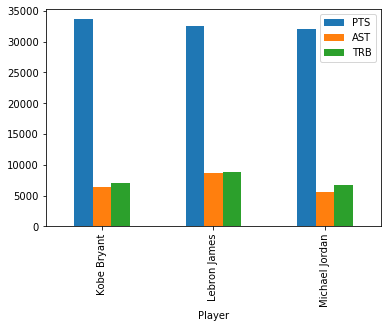

In [6]:
tabla.plot(kind="bar")

In [7]:
f.template()

Hola
